In [1]:
%matplotlib notebook

C:\Users\shahmoradia\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shahmoradia\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\shahmoradia\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\shahmoradia\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import paramonte as pm
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()

In [10]:
df = pd.read_csv("http://www.cdslab.org/recipes/programming/regression-censored-gaussian-data/dataFull.csv")

In [11]:
df.head()

,variable
0,3.48980
1,0.20435
2,0.96737
3,0.62652
4,0.59974


<IPython.core.display.Javascript object>


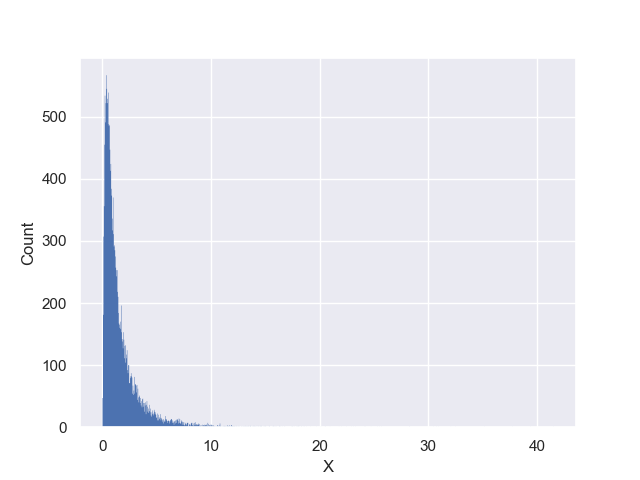

<IPython.core.display.Javascript object>


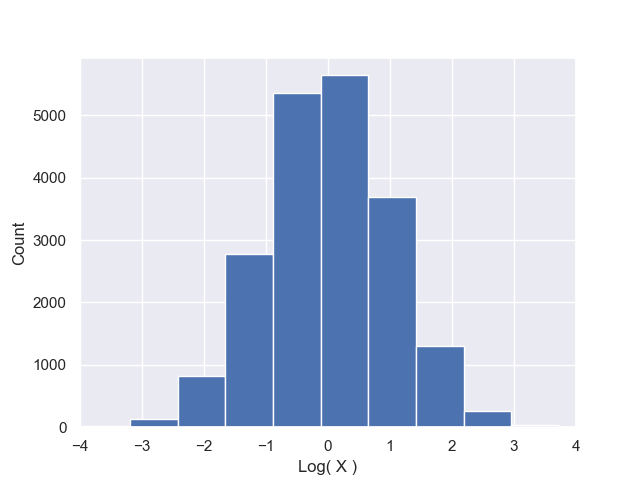

In [31]:
# plot histogram of log(data)

fig = plt.figure()
ax = fig.gca()
ax.hist ( df.iloc[:,0]
        , bins = 1000
        , range = (np.min(df.iloc[:,0]), np.max(df.iloc[:,0]))
        , histtype = "stepfilled"
        , linewidth = 0
        , rwidth = 0
        )
ax.set_xlabel("X")
ax.set_ylabel("Count")
plt.show()
plt.savefig("data.png")

# log-transform data so that it can be fit by a Normal distribution

logx = np.double(np.log(df.iloc[:,0]))

# plot histogram of log(data)

fig = plt.figure()
ax = fig.gca()
ax.hist(logx)
ax.set_xlim([-4,4])
ax.set_xlabel("Log( X )")
ax.set_ylabel("Count")
plt.show()
plt.savefig("logdata.png")

In [13]:
class Normal():

    def __init__(self, normData):
        self.data = normData
        self.ndata = len(self.data)
        self.maxdata = np.max(self.data)

    def getLogProb(self, data, avg, logStd, cutoff):
        """
        Return the logarithm of the probability density of an input set of x values, 
        given the input parameters (avg,logStd,cutoff) for the Gaussian PDF.
        """
        std = np.exp(logStd)
        return - 2.506628274631000 - logStd - 0.5 * ( (data-avg) / std )**2 - np.log(norm.cdf(cutoff, avg, std))

    def getLogLike(self,param):
        if param[2] < self.maxdata:
            # data cannot be larger than the threshold, 
            # so such parameter set for the Gaussian is impossible
            # therefore return negative infinity as the value of the logLikelihood
            return -1.e300
        else:
            return np.sum( self.getLogProb(self.data, param[0], param[1], param[2]) )

normal = Normal(normData = logx)

In [28]:
pmpd = pm.ParaDRAM() # create a ParaDRAM sampler object
pmpd.spec.chainSize = 20000 # change the number of sampled points from default 100,000 to 30,000
pmpd.spec.variableNameList = ["Average","LogStandardDeviation","Cutoff"]
pmpd.spec.startPointVec = [0,0,normal.maxdata] # ensure the initial starting point of the search for cutoff is good.
pmpd.spec.targetAcceptanceRate = [0.1,0.2]

# call MCMC sampler

pmpd.runSampler( ndim = 3
               , getLogFunc = normal.getLogLike
               )


ParaDRAM - NOTE: Running the ParaDRAM sampler in serial mode...
ParaDRAM - NOTE: To run the ParaDRAM sampler in parallel mode visit: cdslab.org/pm
ParaDRAM - NOTE: If you are using Jupyter notebook, check the Jupyter's terminal window
ParaDRAM - NOTE: for realtime simulation progress and report.


ParaDRAM - NOTE: To read the generated output files sample or chain files, try the following:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     pmpd.readSample()      # to read the final i.i.d. sample from the output sample file. 
ParaDRAM - NOTE:     pmpd.readChain()       # to read the uniquely-accepted points from the output chain file. 
ParaDRAM - NOTE:     pmpd.readMarkovChain() # to read the Markov Chain. NOT recommended for extremely-large chains.
ParaDRAM - NOTE: 
ParaDRAM - NOTE: Replace 'pmpd' with the name you are using for your ParaDRAM object.
ParaDRAM - NOTE: For more information and examples on the usage, visit:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     https://www.cdslab.org/paramonte/




ParaDRAM - WARNING: delimiter is neither given as input nor set as a ParaDRAM object property.
ParaDRAM - WARNING: This information is essential for successful reading of the requested sample file(s).
ParaDRAM - WARNING: Proceeding with the default assumption of comma-delimited sample file contents...

ParaDRAM - NOTE: 1 files detected matching the pattern: "D:\Dropbox\Projects\20190704_recipes\recipes.raw\programming\regression-censored-gaussian-data\ParaDRAM_run_20200815_221354_321*_sample.txt"
ParaDRAM - NOTE: processing file: D:\Dropbox\Projects\20190704_recipes\recipes.raw\programming\regression-censored-gaussian-data\ParaDRAM_run_20200815_221354_321_process_1_sample.txt
ParaDRAM - NOTE: reading file contents... done in 0.02194 seconds.
ParaDRAM - NOTE: parsing file contents... done in 0.000997 seconds.
ParaDRAM - NOTE: computing sample correlation matrix... done in 0.00698 seconds.
ParaDRAM - NOTE: computing sample covariance matrix... done in 0.006981 seconds.
ParaDRAM - NOTE: 

<IPython.core.display.Javascript object>


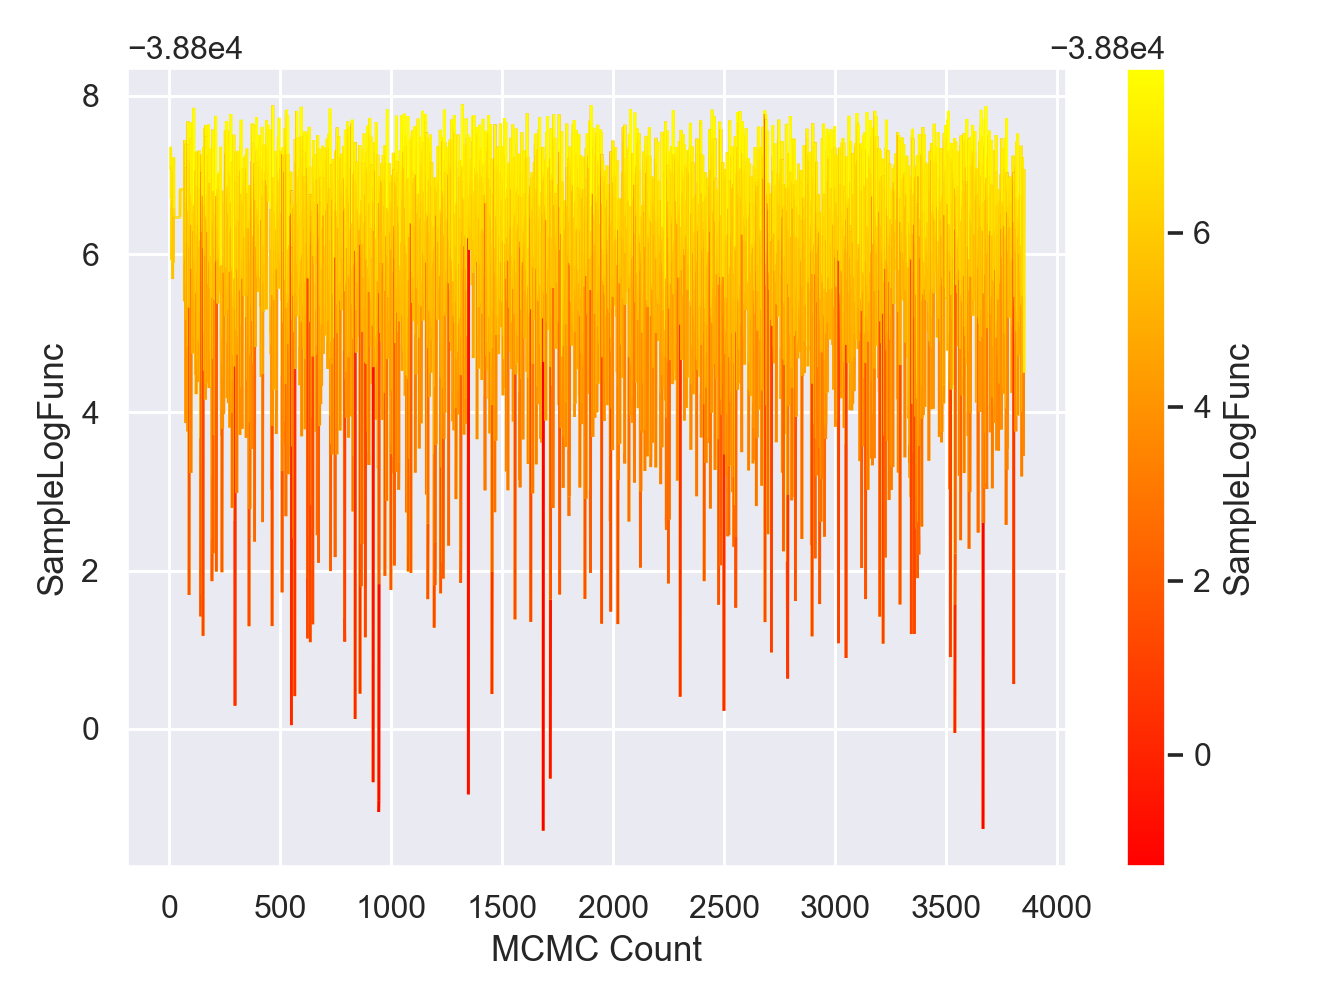

<IPython.core.display.Javascript object>


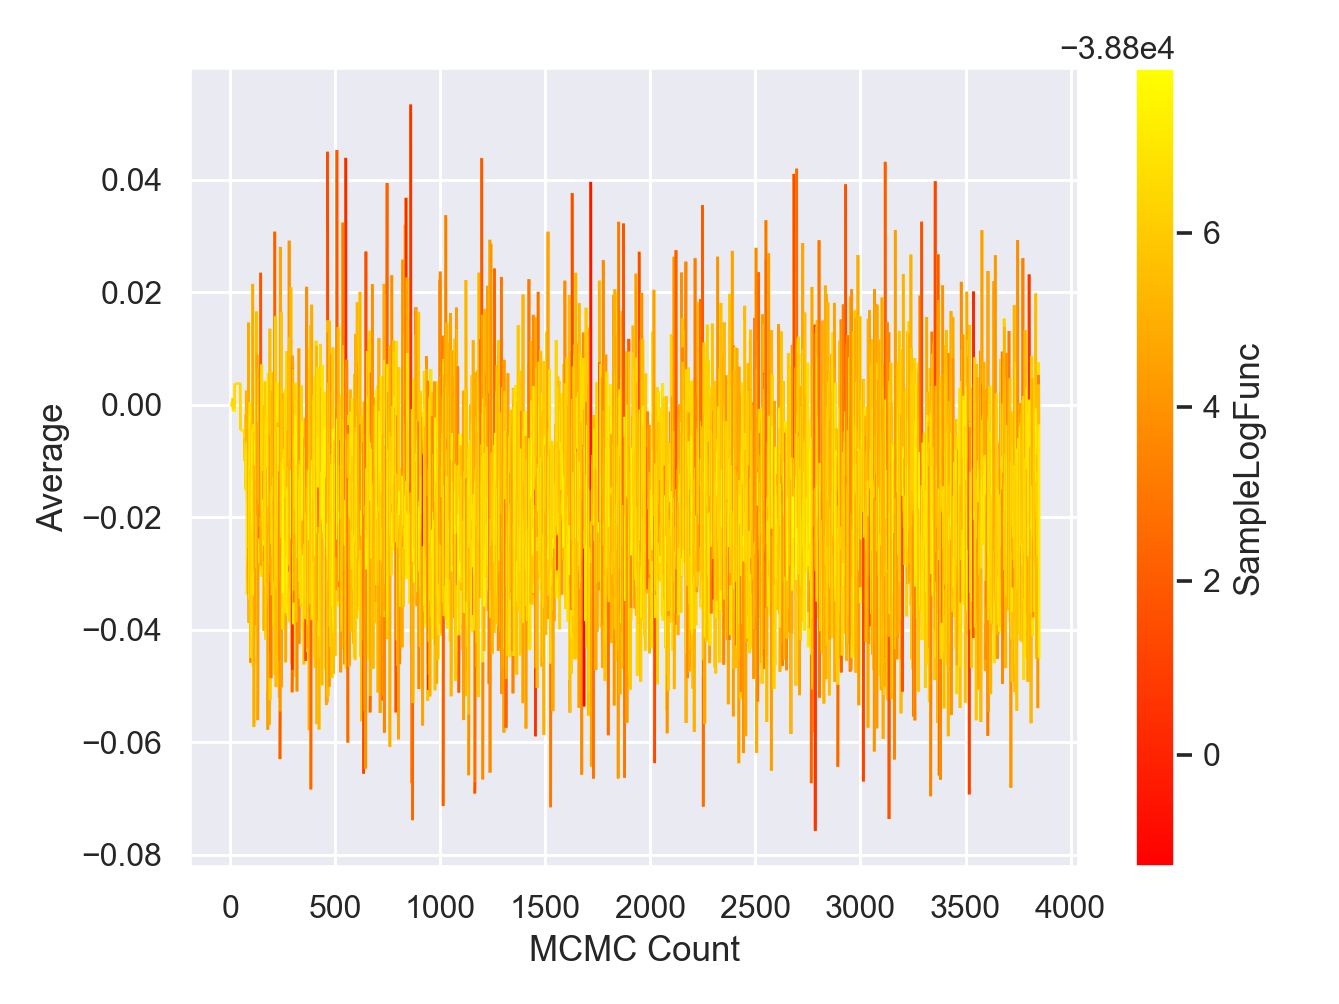

<IPython.core.display.Javascript object>


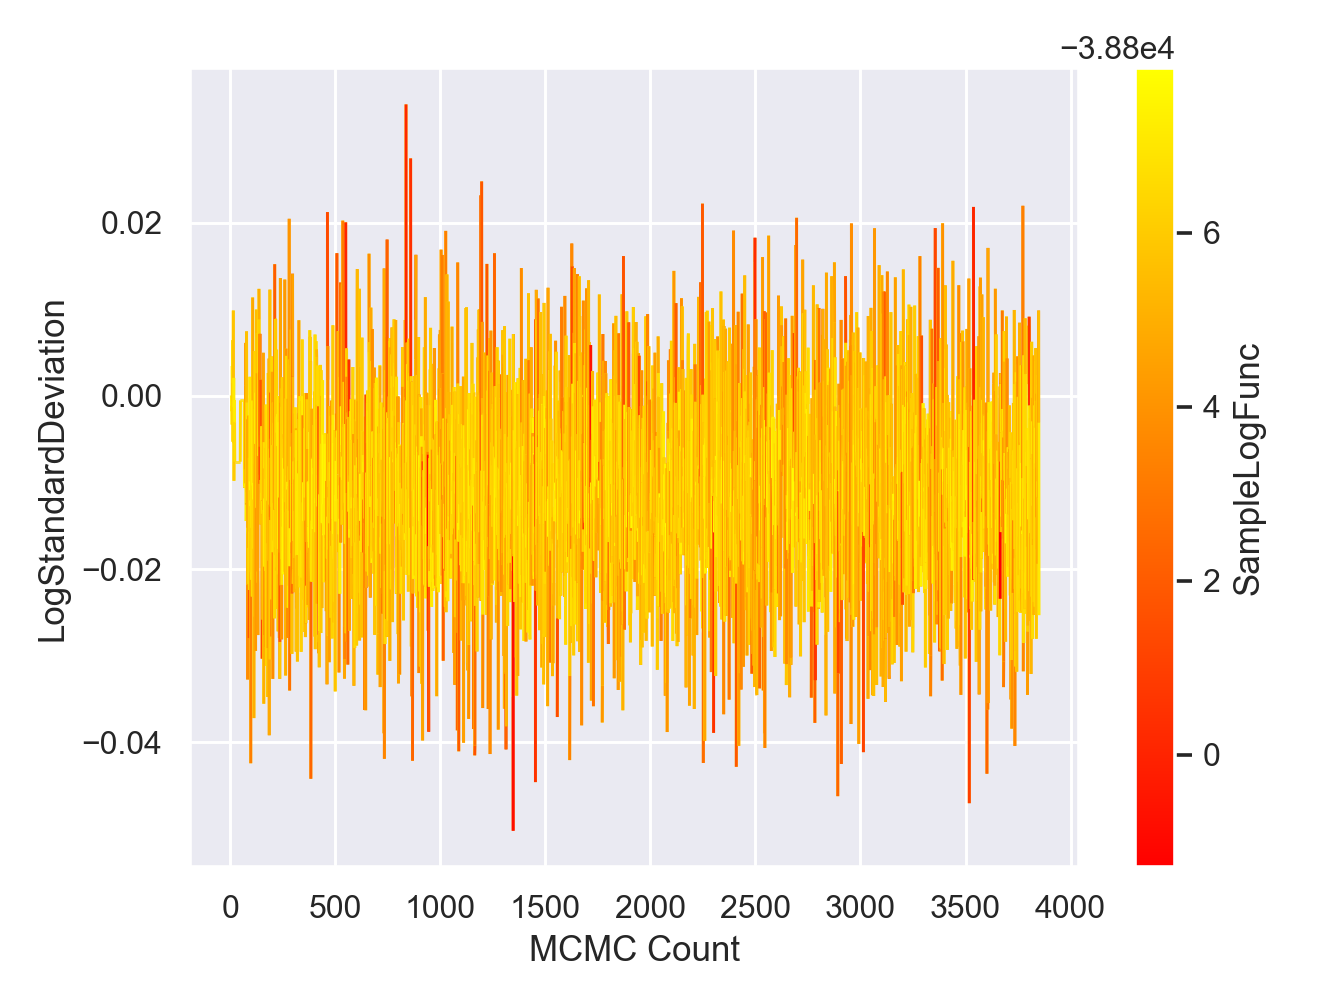

<IPython.core.display.Javascript object>


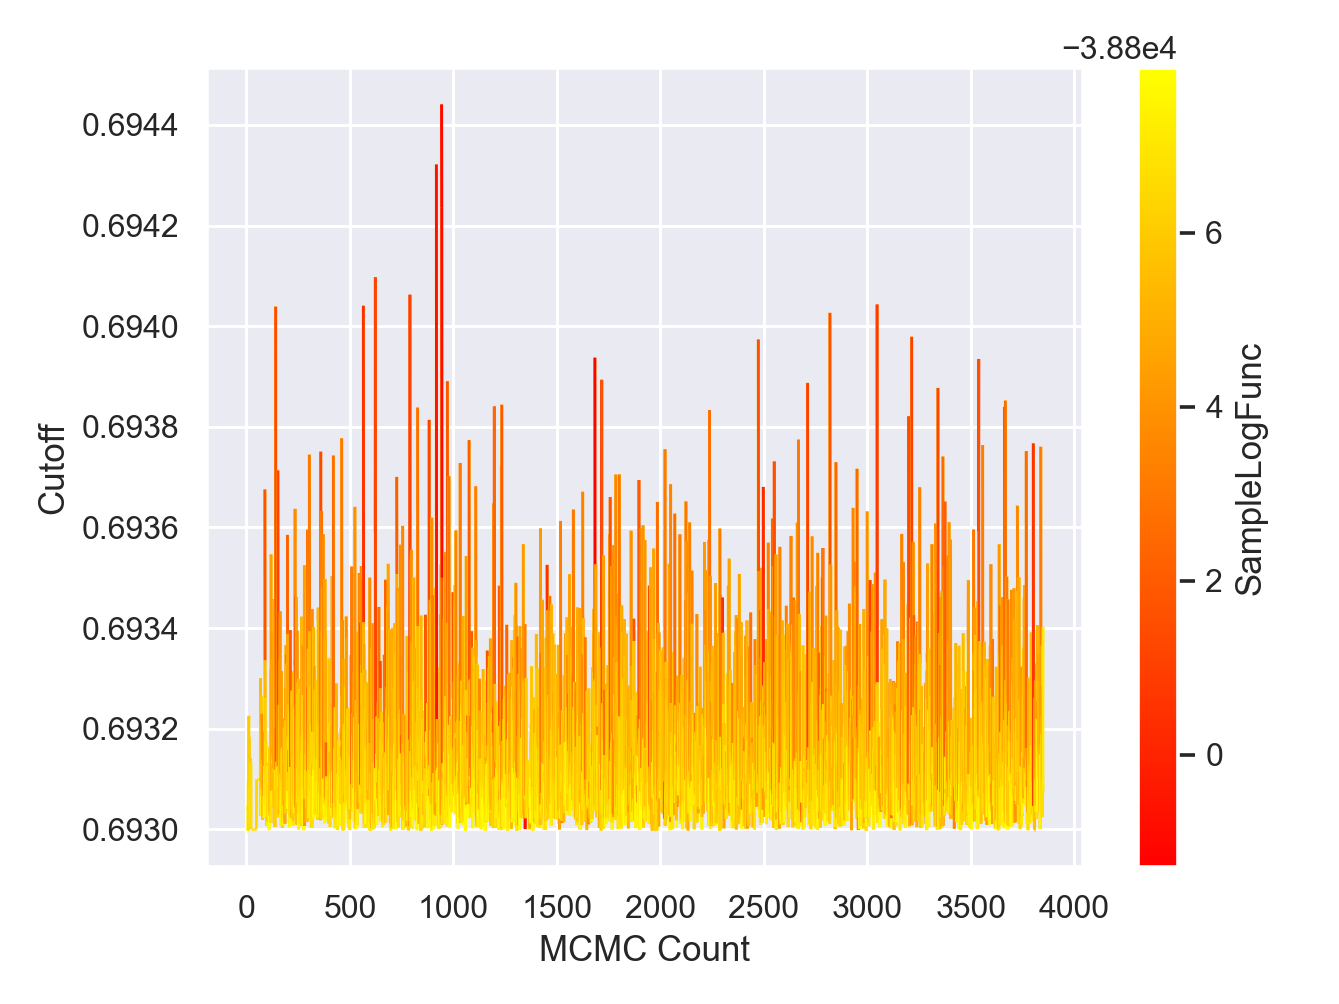

In [30]:
# read the resulting sample
pmpd.readSample()

# plot the sampled variables
for colname in pmpd.sampleList[0].df.columns:
    pmpd.sampleList[0].plot.line.ycolumns = colname
    pmpd.sampleList[0].plot.line.outputFile = "traceplot_" + colname
    pmpd.sampleList[0].plot.line()
    pmpd.sampleList[0].plot.line.currentFig.axes.set_xlabel("MCMC Count")
    pmpd.sampleList[0].plot.line.currentFig.axes.set_ylabel(colname)



<IPython.core.display.Javascript object>


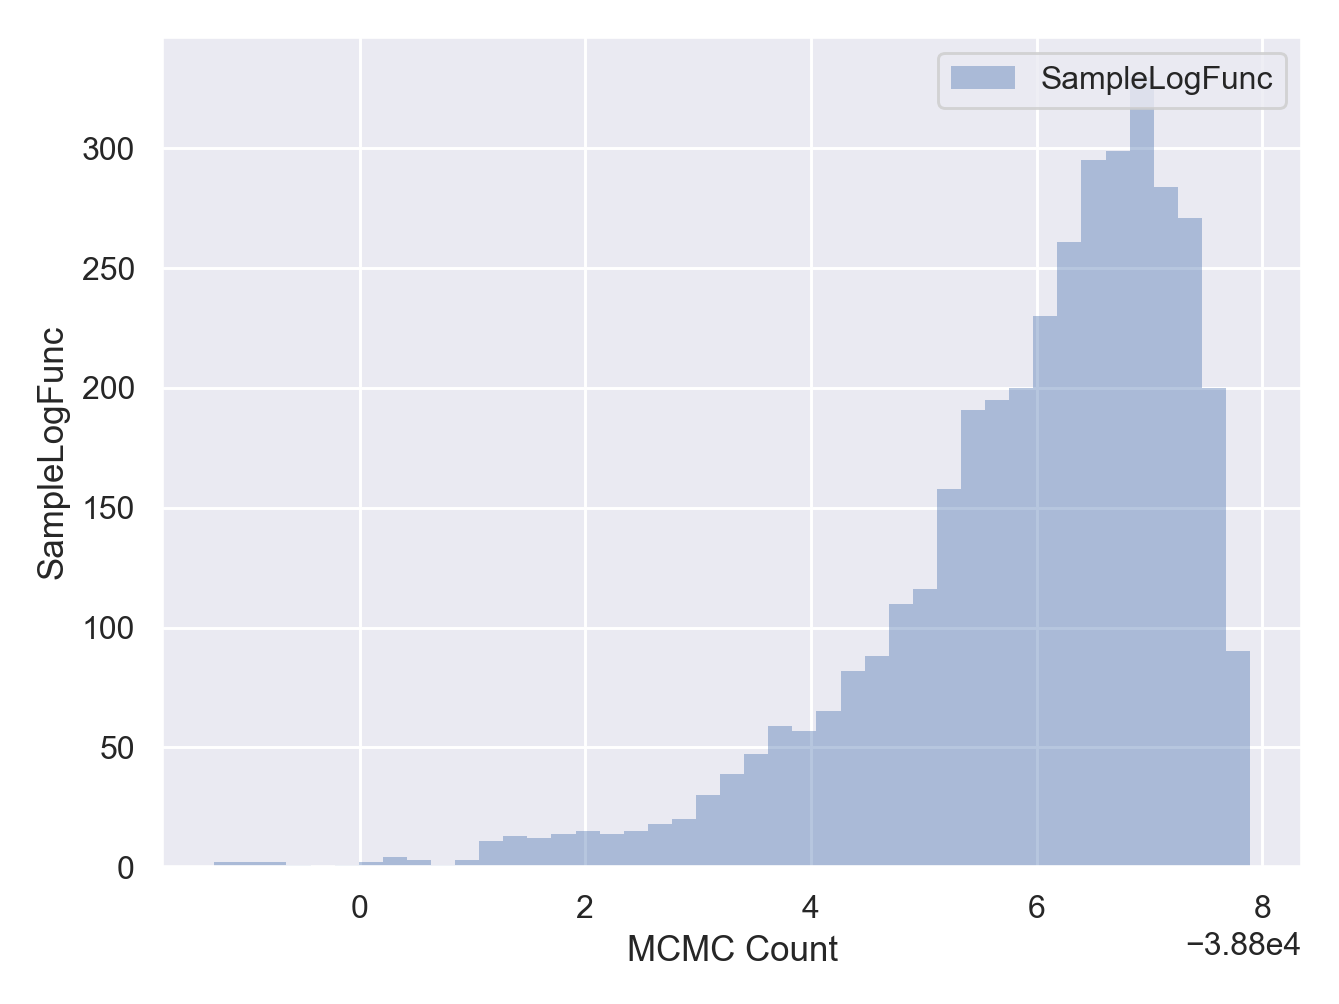

<IPython.core.display.Javascript object>


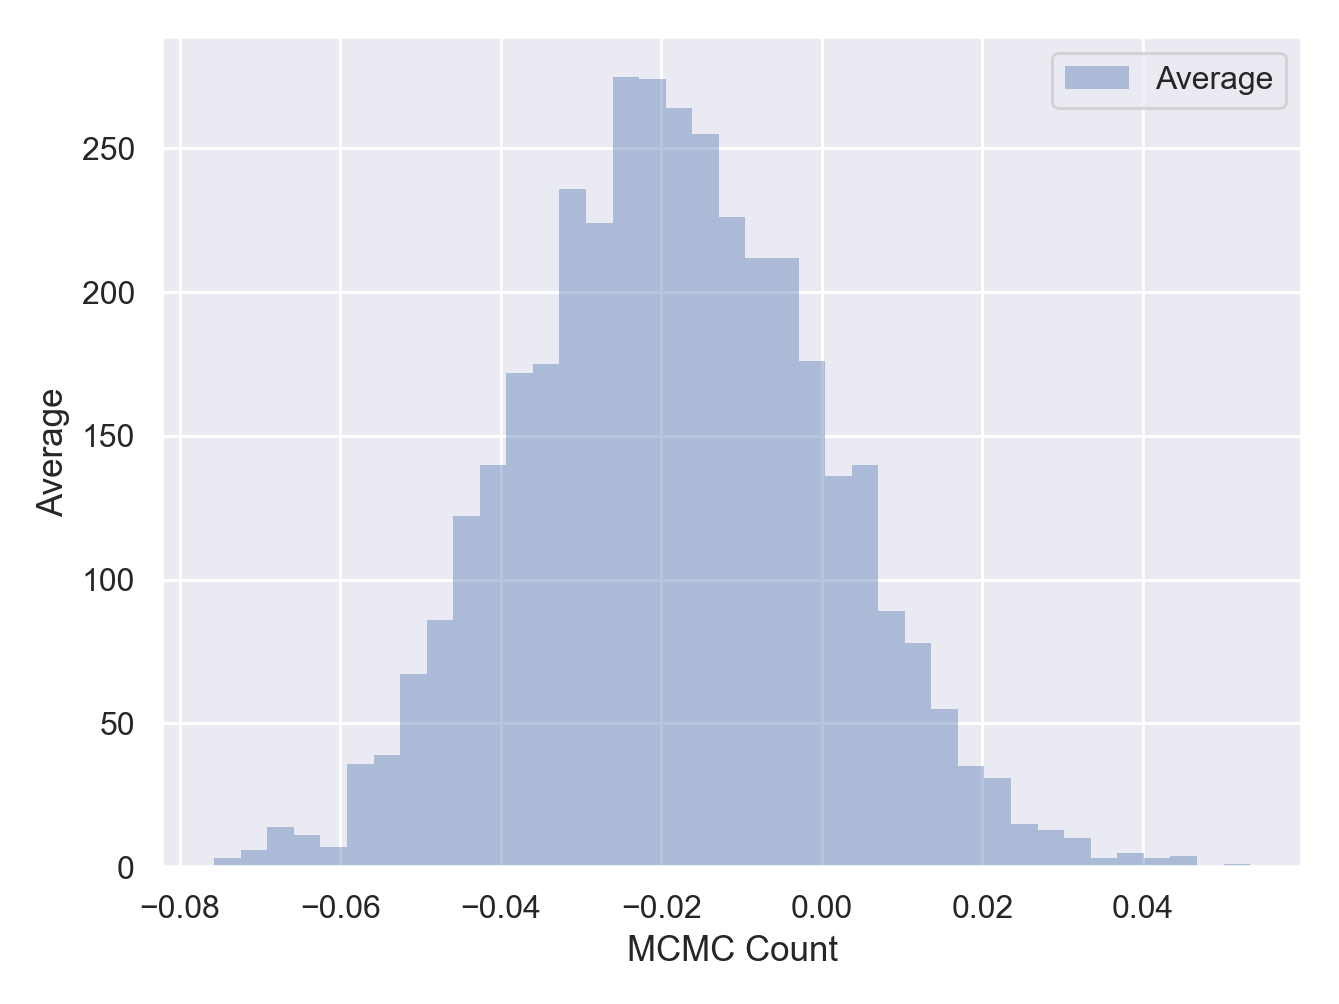

<IPython.core.display.Javascript object>


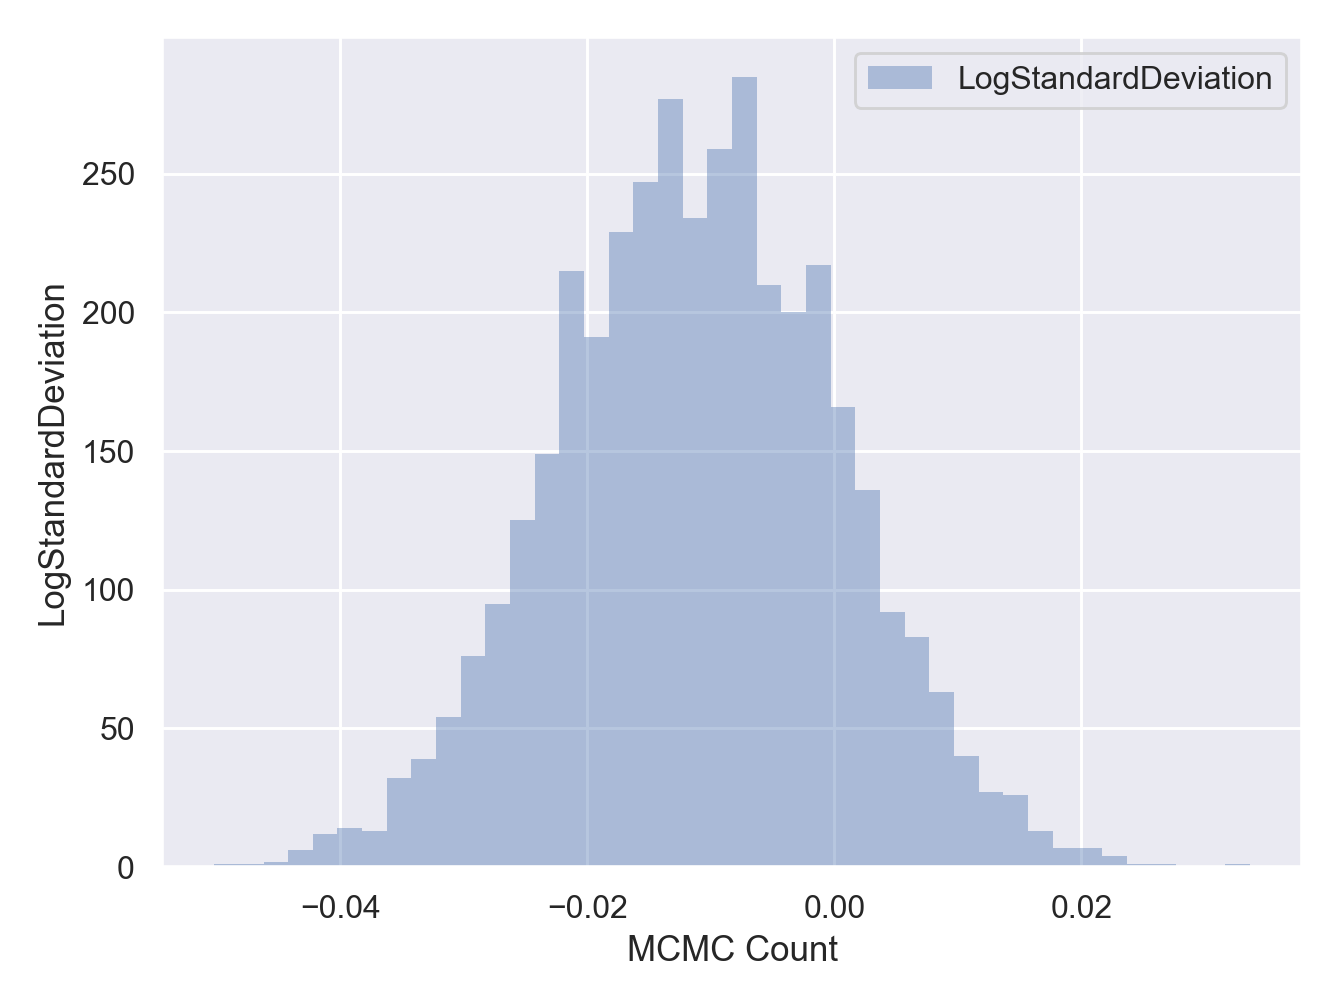

<IPython.core.display.Javascript object>


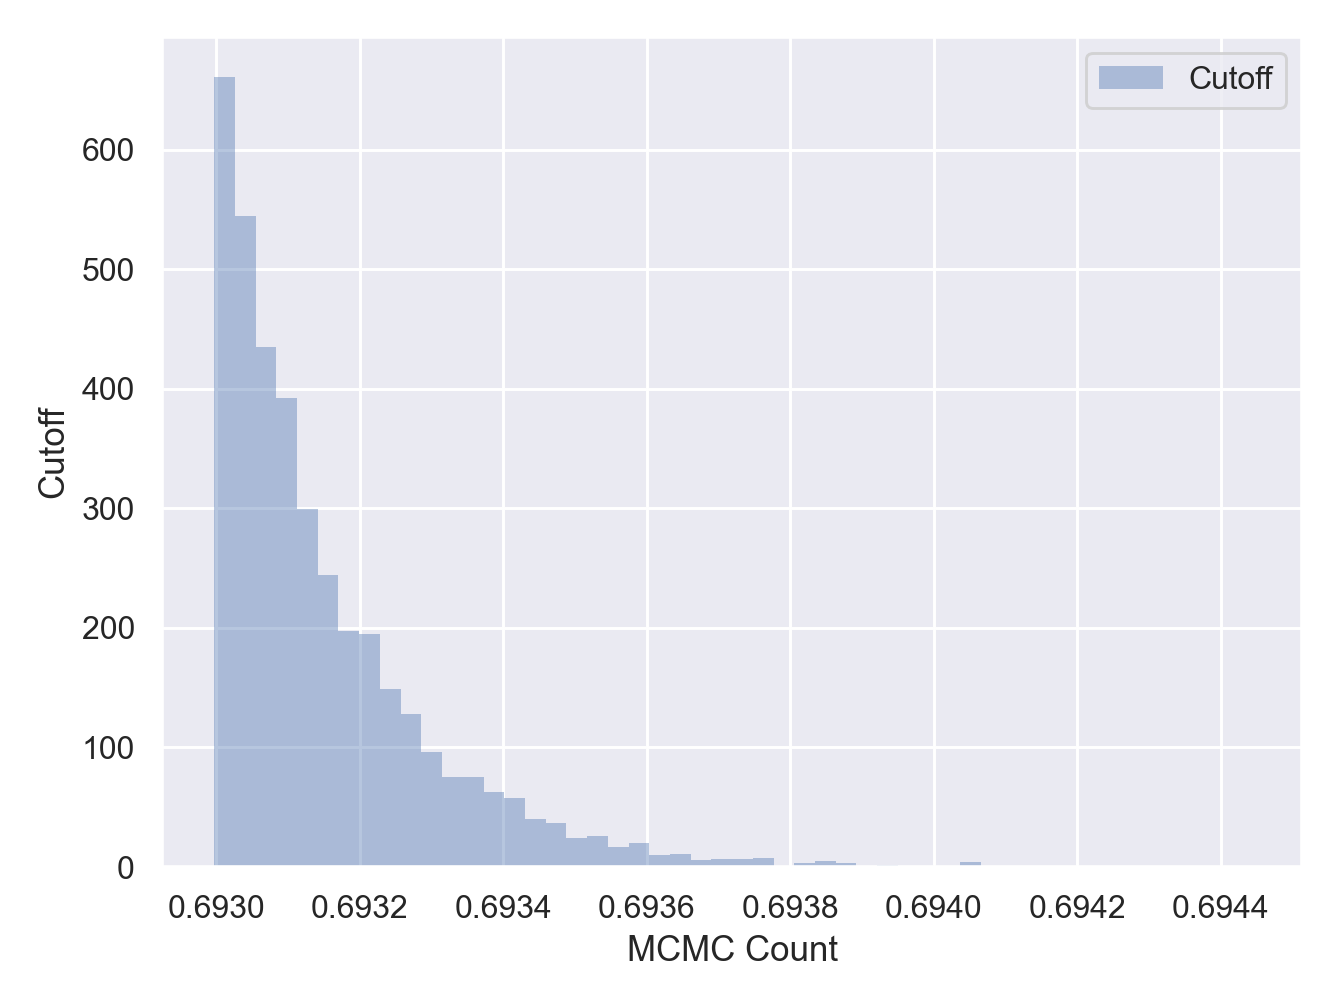

In [32]:
# plot the histograms of the sampled parameters
for colname in pmpd.sampleList[0].df.columns:
    pmpd.sampleList[0].plot.hist.columns = colname
    pmpd.sampleList[0].plot.hist.outputFile = "histogram_" + colname
    pmpd.sampleList[0].plot.hist()
    pmpd.sampleList[0].plot.hist.currentFig.axes.set_xlabel("MCMC Count")
    pmpd.sampleList[0].plot.hist.currentFig.axes.set_ylabel(colname)


In [33]:
pmpd.sampleList[0].df.mean()

SampleLogFunc          -38794.057165
Average                    -0.018469
LogStandardDeviation       -0.011038
Cutoff                      0.693154
dtype: float64

In [ ]:
np.max(logx)

In [ ]:
norm.cdf(cutoff, avg, std)

In [ ]:
pmpd.sampleList[0].plot.hist.columns